# Semantic Text Similarity

## Introduction
The aim of the assignment is to predict the semantic similarity between pairs of sentences. In order to perform the task **stsbencmark** dataset was provided to perform the task.
The stsbenchamrk is composed and organised by pairs of English sentences, to which a score that ranges between 0 and 5 was assigned by humans.
The selection of dataset include text from image captions, news headlines and user forums.
In order to provide a standard benchmark to compare among meaning representation systems the dataset has been divided into:
- **Train set**: dataset used to train the models and see their performance.  
- **Development set**: dataset used to tune the hyperparameters of the models.
- **Test set**: dataset used to make predictions.

## Preliminary Analysis
In this section a preliminary analysis on the dataset was performed, this allowed to have a better understanding on the dataset available to perform the task.
Different methods were applied and in particular some basic statistic methods were used to define some characetristics of it.


As a first step, all the necessary **libraries** to perform the task were imported and/or installed.

In [ ]:
!pip install --upgrade gensim
!pip install POT
!pip install contractions
!pip install iteration-utilities
!pip install transformers
!pip install sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas import read_csv
from csv import QUOTE_NONE
from numpy import diag
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import gensim
import numpy as np
import pandas as pd

import contractions
import spacy
import en_core_web_sm
nlp_model = en_core_web_sm.load()

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nlp_model = en_core_web_sm.load()


import gensim.downloader as api
from scipy.spatial import distance

from gensim.test.utils import common_texts
from gensim.models import Word2Vec

from gensim.models import FastText
from gensim.test.utils import datapath

#Importing the necessary libraries for TF-IDF
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from scipy.spatial import distance

from collections import Counter

from iteration_utilities import duplicates

import gensim.downloader
import matplotlib.pyplot as plt

from sklearn.svm import SVR
import torch
from transformers import BertTokenizer, BertModel
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sentence_transformers import SentenceTransformer, util, InputExample, losses, evaluation
import math
import csv
import gzip
import os
import torch
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

The perlimaniary analysis was mainly performed on the train dataset. Therefore, the train set was imported using the  read_csv function. What has been noticed was that the dataset is composed of the following informations:
1. **Genre**: represents the category from which the pair of sentences were extracted. The categories corresponds to three different genres which are: news, captions and forum.
2. **Year**
3. **Score**: that has been assigned by humans, which decsribes the similarity between the two sentences. The range of the score goes from 0 to 5.
4. **Sentence one**
5. **Sentence two**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path_train="/content/drive/MyDrive/Colab Notebooks/Assigment NLP/stsbenchmark/sts-train.csv"
path_test="/content/drive/MyDrive/Colab Notebooks/Assigment NLP/stsbenchmark/sts-test.csv"
path_dev="/content/drive/MyDrive/Colab Notebooks/Assigment NLP/stsbenchmark/sts-dev.csv"
header = ['Genre','Year','Score','Sentence 1','Sentence2']
data_train = pd.read_csv(path_train, sep='\t', usecols=[1,2,4, 5, 6], header=None, quoting=QUOTE_NONE, names=header)
data_train

,Genre,Year,Score,Sentence 1,Sentence2
0,MSRvid,2012test,5.00,A plane is taking off.,An air plane is taking off.
1,MSRvid,2012test,3.80,A man is playing a large flute.,A man is playing a flute.
2,MSRvid,2012test,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,MSRvid,2012test,2.60,Three men are playing chess.,Two men are playing chess.
4,MSRvid,2012test,4.25,A man is playing the cello.,A man seated is playing the cello.
...,...,...,...,...,...
5744,headlines,2016,0.00,Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia
5745,headlines,2016,0.00,Dozens of Egyptians hostages taken by Libyan t...,Egyptian boat crash death toll rises as more b...
5746,headlines,2016,0.00,President heading to Bahrain,President Xi: China to continue help to fight ...
5747,headlines,2016,0.00,"China, India vow to further bilateral ties",China Scrambles to Reassure Jittery Stock Traders


Once visualized the dataset, the idea was to see how many pairs of sentences were available for each of the **Genre**.
To extract which were the different genres, the **set function** was used.
The only genres present in the train set, as it can be seen are:
- MSRpar
- Deft-forum
- Images
- Deft-news
- Headlines
- MSRvid

In [ ]:
categories =  data_train["Genre"].tolist()
labels = set(categories)

In [ ]:
print(labels)

{'MSRpar', 'deft-forum', 'images', 'deft-news', 'headlines', 'MSRvid'}


Once the different genres were known, for each of them their frequency of apperance in the dataset was counted.

In [ ]:
label_count= Counter(categories)
label_count

Counter({'MSRvid': 1000,
         'images': 1000,
         'deft-forum': 450,
         'MSRpar': 1000,
         'deft-news': 300,
         'headlines': 1999})

In [ ]:
label_count.keys()

dict_keys(['MSRvid', 'images', 'deft-forum', 'MSRpar', 'deft-news', 'headlines'])

Finally, a **plot** was realized by taking into consideration the frequency of appearance of each genre in the train set, as it can be seen in the cell below.

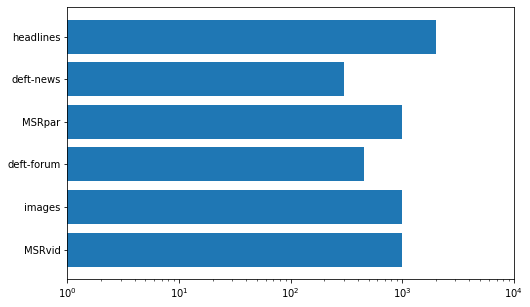

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 5))
plt.barh(range(len(label_count)), label_count.values())
plt.yticks(range(len(label_count)), label_count.keys())
plt.xscale('log')
plt.xlim([1, 10000])
plt.show()

Subsequently, the decision  was to extract for all the  samples in the different datasets just the columns 4, 5 and 6 which respectively corresponds to:
- **Score**
- **Sentence 1**
- **Sentence 2**
In order to keep the relevant informations to perfrom the comparison between sentences.

In [ ]:
data_train = pd.read_csv(path_train, sep='\t', usecols=[4, 5, 6], names=["Score", "Sentence 1", "Sentence 2"],header=None, quoting=QUOTE_NONE)
data_train

,Score,Sentence 1,Sentence 2
0,5.00,A plane is taking off.,An air plane is taking off.
1,3.80,A man is playing a large flute.,A man is playing a flute.
2,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,2.60,Three men are playing chess.,Two men are playing chess.
4,4.25,A man is playing the cello.,A man seated is playing the cello.
...,...,...,...
5744,0.00,Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia
5745,0.00,Dozens of Egyptians hostages taken by Libyan t...,Egyptian boat crash death toll rises as more b...
5746,0.00,President heading to Bahrain,President Xi: China to continue help to fight ...
5747,0.00,"China, India vow to further bilateral ties",China Scrambles to Reassure Jittery Stock Traders


In [ ]:
data_dev= pd.read_csv(path_dev, sep='\t', usecols=[4,5, 6],names=["Score","Sentence 1", "Sentence 2"], header=None, quoting=QUOTE_NONE)
data_dev

,Score,Sentence 1,Sentence 2
0,5.00,A man with a hard hat is dancing.,A man wearing a hard hat is dancing.
1,4.75,A young child is riding a horse.,A child is riding a horse.
2,5.00,A man is feeding a mouse to a snake.,The man is feeding a mouse to the snake.
3,2.40,A woman is playing the guitar.,A man is playing guitar.
4,2.75,A woman is playing the flute.,A man is playing a flute.
...,...,...,...
1495,2.00,Scientists prove there is water on Mars,Has Nasa discovered water on Mars?
1496,0.00,Pranab stresses need to strive for peace by na...,WTO: India regrets action of developed nations
1497,2.00,Volkswagen skids into red in wake of pollution...,"Volkswagen's ""gesture of goodwill"" to diesel o..."
1498,0.00,Obama is right: Africa deserves better leadership,Obama waiting for midterm to name attorney gen...


In [ ]:
data_test= pd.read_csv(path_test, sep='\t', usecols=[4,5, 6],names=["Score","Sentence 1", "Sentence 2"], header=None, quoting=QUOTE_NONE)
data_test

,Score,Sentence 1,Sentence 2
0,2.5,A girl is styling her hair.,A girl is brushing her hair.
1,3.6,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.
2,5.0,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.
3,4.2,A man is cutting up a cucumber.,A man is slicing a cucumber.
4,1.5,A man is playing a harp.,A man is playing a keyboard.
...,...,...,...
1374,0.0,"Philippines, Canada pledge to further boost re...",Philippines saves 100 after ferry sinks
1375,1.0,Israel bars Palestinians from Jerusalem's Old ...,"Two-state solution between Palestinians, Israe..."
1376,1.0,How much do you know about Secret Service?,Lawmakers from both sides express outrage at S...
1377,0.0,Obama Struggles to Soothe Saudi Fears As Iran ...,Myanmar Struggles to Finalize Voter Lists for ...


To perform some basic statsitics on the dataset, a unique document was created containing all sentences and stored in the variable *sentences* for train, development and test set.

In [ ]:
sentences1_train = (data_train['Sentence 1'].tolist())
sentences2_train = (data_train['Sentence 2'].tolist())
scores_train = (data_train['Score'].tolist())
sentences_train =  sentences1_train+sentences2_train


In [ ]:
sentences1_dev = (data_dev['Sentence 1'].tolist())
sentences2_dev = (data_dev['Sentence 2'].tolist())
scores_dev = (data_dev['Score'].tolist())
sentences_dev =  sentences1_dev+sentences2_dev


In [ ]:
sentences1_test = (data_test['Sentence 1'].tolist())
sentences2_test = (data_test['Sentence 2'].tolist())
scores_test = (data_test['Score'].tolist())
sentences_test =  sentences1_test+sentences2_test


Now lets consider only the train set.
The length of the whole document was computed, and it has been noticed that the train set contains **11498 sentences**.  

In [ ]:
len(sentences_train)

11498

To eliminate repeating sentences in the document between the 11498 sentences of the train set, the **set function** was applied.
Therefore, each sentence was just taken into consideration only once. As it can be seen, the number of sentences has been  reduced, from 11498  to **10566 sentences**.


In [ ]:
sentences_unique = set(sentences_train)
len(sentences_unique)

10566

To check if the set function worked correctly and retrieved sentences from the dataset, by transforming ot into a list containing all the unqiue sentences.

In [ ]:
sentences_unique = list(sentences_unique)
sentences_unique

The histogram of **average length** of  unique sentences (based on words) was performed and can be visualized in the cell below.

Average length:  10.173670263108082


(array([4.218e+03, 3.880e+03, 1.465e+03, 5.820e+02, 3.280e+02, 7.900e+01,
        7.000e+00, 3.000e+00, 3.000e+00, 1.000e+00]),
 array([ 2. ,  7.4, 12.8, 18.2, 23.6, 29. , 34.4, 39.8, 45.2, 50.6, 56. ]),
 <BarContainer object of 10 artists>)

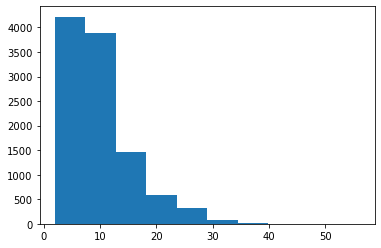

In [ ]:
import matplotlib.pyplot as plt
# print('mean: ', np.mean(sentences_unique))
lengths = [len(sent.split()) for sent in sentences_unique]
print("Average length: ", np.mean(lengths))
plt.hist(lengths)

Then, the **distribution of the score variable** contained in the train dataset can be visualized.

2.7009990253653395


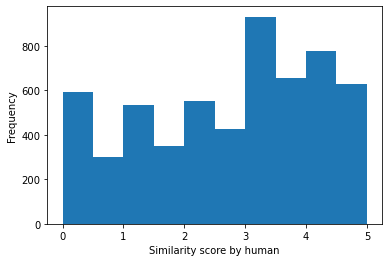

In [ ]:
import matplotlib.pyplot as plt

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

plt.hist(data_train["Score"], bins=10)
plt.xlabel('Similarity score by human')
plt.ylabel('Frequency')

print(np.mean(data_train['Score']))

### Vectorizing the Sentences

To perform further analysis, the whole document was converted into a **vector format**. In particular, **TfidfVectorizer from Scikit-Learn** was used to do so.

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

Therefore, the vectorizer can be fitted on the document containing the unique sentences.

In [ ]:
vectorizer.fit(sentences_unique)

TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

The **vocabulary size** can be then looked at, and it can be seen that it's length is of **2818 words**, it's quite small.

In [ ]:
vocab = vectorizer.get_feature_names_out()

print(f"Length of vocabulary: {len(vocab)}")

Length of vocabulary: 2818


Some  random sample of 500 terms from the documents were printed to see what they looked like.

In [ ]:
import random

sorted(random.sample(vocab.tolist(),50))

['100',
 '27',
 '89',
 'access',
 'affected',
 'agricultural',
 'amnesty',
 'association',
 'bed',
 'belgium',
 'brick',
 'brings',
 'cargo',
 'casualties',
 'catching',
 'cell',
 'choose',
 'dance',
 'die',
 'dress',
 'egyptians',
 'estonia',
 'false',
 'freed',
 'groups',
 'ixic',
 'laws',
 'licking',
 'mainland',
 'moon',
 'nears',
 'pakistani',
 'planes',
 'policeman',
 'posts',
 'profits',
 'promote',
 'quake',
 'rejects',
 'reportedly',
 'returns',
 'selected',
 'spokeswoman',
 'swing',
 'town',
 'walks',
 'weather',
 'week',
 'wheel',
 'years']

All the sentences belonging to the dataset were then vectorized and stored in the **vector_sentences** variable.

In [ ]:
vector_sentences = vectorizer.transform(sentences_unique)

The sparse vector for the first document has been printed:

In [ ]:
print(vector_sentences[0])
type(vector_sentences[4])

  (0, 2440)	0.5085671647193073
  (0, 2362)	0.3356542944341998
  (0, 1608)	0.4993155178041111
  (0, 1390)	0.2812249025558995
  (0, 146)	0.40103130445042534
  (0, 46)	0.37345159567268205


scipy.sparse.csr.csr_matrix

The average vocabulary size of a document in the collection has been computed:

In [ ]:
nonzero_count = vector_sentences.count_nonzero()
doc_count = vector_sentences.get_shape()[0]

print(f"Average document vocabulary size: {nonzero_count/doc_count}")

Average document vocabulary size: 4.841945864092372


### Searching the collection based on keywords
Based on a chosen query, the sentence that contains it can be return by using the following method.

In [ ]:
query = 'A plane'
#query = 'computer'
#query = '2008'

query_vec = vectorizer.transform([query])[0]

index = np.argmax([query_vec.multiply(vector_sentences[i]).sum() for i in range(len(sentences_unique))])
print(sentences_unique[index])

A plane being readied for take-off.


## Training Models
For what concerns the models to be trained and then used to do the predictions on the test set a **preprocessing** had to be performed on senteces for some of them.
In particular, different methods were used to extract word-embeddings such as: *TFIDF, Fasttext, Word2Vec and BERT*.

While, regarding the different models used, these can be divided into:
1. **Unsupervised Models**: TFIDF with cosine similarity and fasttext
2. **Supervised Models**: Support Vector Regression trained on some particular features.
3. **Deep Learning Models**: finetuning different transformer-based on sBERT models and further improvements


### Unsupervised Models
At first some Unsupervised models were trained, in particular the **TF-IDF based on cosine similarity and the fasttext** were used.
Each of them gave different results and were both then used to do predictions on the test set.


#### Preprocessing
Before applying the actual preprocessing that has been performed for both the unsupervised models, all duplicate samples  were removed from the train dataset.
Therefore, both tuples with pairs of sentences and tuples of pairs of sentences with their scores were made.
Subsequently, the function **duplicates** was used to actually know which were the exact samples duplicates for both the one containg the score and not.

In [ ]:
sentence_pairs_scores = list(zip(sentences1_train,sentences2_train,scores_train))
sentence_pairs = list(zip(sentences1_train,sentences2_train))

In [ ]:
dups = list(duplicates(sentence_pairs))
dups_scores = list(duplicates(sentence_pairs_scores))


In [ ]:
dups
dups_scores1,dups_scores2,_ = list(zip(*dups_scores))
dups_scores = list(zip(dups_scores1,dups_scores2))
dups_sent = list(set(dups)-set(dups_scores))

Once obtained the duplicates, they were deleted when the scores were different by replacing the corresponding score with the *mean value* of the different avialbale ones for that same pair of sentence.

In [ ]:
for pair in dups_sent:
    indices = [i for i in range(len(sentence_pairs)) if sentence_pairs[i] == pair]
    scores = np.array(sentence_pairs_scores)[np.array(indices)][:,2]
    new_score = sum(scores.astype(float))/len(indices)
    for i in np.array(indices):
        sentence_pairs_scores.pop(i)
        sentence_pairs.pop(i)
    sentence_pairs_scores.append(pair+(new_score,))


Subsequently, duplicate sentences with same score were deleted.

In [ ]:
sentence_pairs_scores_unique = set(sentence_pairs_scores)


Finally, the final dataset with no duplicate pairs of sentences was computed and actually used for the following steps.


In [ ]:
sentence_unique1,sentence_unique2,scores_unique = list(zip(*sentence_pairs_scores_unique))

The actual preprocessing consisted of using the following techniques on the new dataset:
1. **Normalization**
2. **Lemmatization**
3. **Removing stopwords:**  stopwords such as not and no were kept, because if not some of the preprocessed sentences would have been empy strings.

In [ ]:
def preprocess_sentences(sentence, stopwords=[]):
    sentence = contractions.fix(sentence)
    preprocessed = [token.lemma_.lower() for token in nlp_model(sentence) if token.is_alpha and token.text.lower() not in [stopword.lower() for stopword in stopwords]]
    if preprocessed == []:
        return [token.lemma_.lower() for token in  nlp_model(sentence) if token.is_alpha]
    else:
        return preprocessed

In [ ]:
custom_stopwords = list(set(stopwords.words('english')) - {'not','no'})

def sentences_preprocessed(sentences1,sentences2):
    sentences_prep1 = []

    for sentence in sentences1:
        sentences_prep1.append(preprocess_sentences(sentence,custom_stopwords))

    sentences_prep2 = []
    for sentence in sentences2:
        sentences_prep2.append(preprocess_sentences(sentence,custom_stopwords))


    return (sentences_prep1,sentences_prep2)

sentences_prep1_train,sentences_prep2_train = sentences_preprocessed(sentence_unique1,sentence_unique2)
sentences_prep1_dev,sentences_prep2_dev =  sentences_preprocessed(sentences1_dev,sentences2_dev)
sentences_prep1_test,sentences_prep2_test =  sentences_preprocessed(sentences1_test,sentences2_test)

Uniting together preprocessed pairs of sentences to then train the models.

In [ ]:
sentences_prep_train = sentences_prep1_train + sentences_prep2_train
sentences_prep_test = sentences_prep1_test + sentences_prep2_test
sentences_prep_dev = sentences_prep1_dev + sentences_prep2_dev

##### TF_IDF
First model to be trained by computing the TFIDF and using the cosine similarity to define similarity between pairs of sentences.

In [ ]:
vectorizer = TfidfVectorizer()
corpus = [' '.join(sentence) for sentence in sentences_prep1_train+sentences_prep2_train]
vectors = vectorizer.fit_transform(corpus)

def tf_idf_features(sentences_prep1,sentences_prep2):
    sentences_tfif_embd1 = vectorizer.transform([' '.join(sentence) for sentence in sentences_prep1])
    sentences_tfif_embd2 = vectorizer.transform([' '.join(sentence) for sentence in sentences_prep2])
    results = []
    for idx in range(sentences_tfif_embd2.shape[0]):
        result = cosine_sim(sentences_tfif_embd1[idx].toarray().squeeze(), sentences_tfif_embd2[idx].toarray().squeeze()) # toarray() to convert from sparse array into dense array
        results.append(result)
    return results

Once defined the *tf_idf_feature function*, which calculate the cosine similarity between previosuly calculated sentence embeddings, it has been defined for train, development and test set.

In [ ]:
def cosine_sim(a,b):
    e = 1e-5
    return (np.dot(a,b)+e)/(np.linalg.norm(a)*np.linalg.norm(b)+e)

In [ ]:
features_tfidf_cos_train =  tf_idf_features(sentences_prep1_train,sentences_prep2_train)
features_tfidf_cos_dev = tf_idf_features(sentences_prep1_dev,sentences_prep2_dev)
features_tfidf_cos_test = tf_idf_features(sentences_prep1_test,sentences_prep2_test)

In [ ]:
features_tfidf_cos_train

[0.6553623150723038,
 0.8218116144360694,
 0.7357212746660071,
 0.46837528826747454,
 9.999900000999992e-06,
 0.8900755024068617,
 0.3951442644266862,
 0.9128728747584265,
 0.31639196484783844,
 0.09127934963704534,
 0.41771611505901735,
 0.8678053798297876,
 0.7666525688328356,
 0.5033568166317176,
 0.7114653767477278,
 0.721483455798384,
 0.2068301015787843,
 0.271372273757971,
 0.6973884676409101,
 0.8573174580065315,
 0.4240432592047683,
 0.6643502230233471,
 0.3565725754929478,
 0.1425075201086075,
 0.1281664970327616,
 0.8389504374607415,
 0.7620859075007154,
 0.6885024994147723,
 0.7020852812227947,
 0.3608789556548053,
 0.08608325492492475,
 0.6193623043913238,
 0.39347649350168834,
 0.5036429568741388,
 0.708844931448859,
 9.999900000999992e-06,
 0.9298618329414567,
 0.8620105685475323,
 0.3978523019533419,
 0.3572700135038073,
 1.0,
 0.7788359174415885,
 0.0890480571143836,
 0.7448584342572544,
 0.6285035020844544,
 0.5314519333864546,
 0.6629696225794884,
 0.6254372783533577

In [ ]:
#features_tfidf_cos

#### FastText
FastText was trained in two different ways:
1. **Trained on our dataset**
2. **Pre-trained dataset**: using the lee_backgorund available one.


Firstly it can be seen the fasttext trained on the available dataset in the following cells:

In [ ]:
# Training our own model
model_ft = FastText(vector_size = 300, min_count=5,sg = 1,seed = 345)
model_ft.build_vocab(corpus_iterable=sentences_prep1_train+sentences_prep2_train)
model_ft.train(corpus_iterable = sentences_prep1_train+sentences_prep2_train,total_examples=model_ft.corpus_count, epochs=model_ft.epochs)



(283690, 361190)

Calculating WM distance between obtained fastText embedding. Subsequently, extracting features that are then used in supervised models.

In [ ]:
feature_FT_wmdistance_train = [[model_ft.wv.wmdistance(sentences_prep1_train[i],sentences_prep2_train[i])] for i in range(len(sentences_prep1_train))]
feature_FT_wmdistance_dev = [[model_ft.wv.wmdistance(sentences_prep1_dev[i],sentences_prep2_dev[i])] for i in range(len(sentences_prep1_dev))]
feature_FT_wmdistance_test = [[model_ft.wv.wmdistance(sentences_prep1_test[i],sentences_prep2_test[i])] for i in range(len(sentences_prep1_test))]


The other way the FastText model can be build is training a model on our data set and then updating it with pretrained FastText model

In [ ]:
model_ft_buildup = FastText(vector_size = 300, min_count=5,sg = 1,seed = 345)
model_ft_buildup.build_vocab(corpus_iterable=sentences_prep_train)
model_ft_buildup.train(corpus_iterable = sentences_prep1_train+sentences_prep2_train,total_examples=model_ft.corpus_count, epochs=model_ft.epochs)

corpus_file = datapath('lee_background.cor')
model_ft_buildup.build_vocab(corpus_file=corpus_file, update=True)

In [ ]:
feature_bFT_wmdistance_train = [[model_ft_buildup.wv.wmdistance(sentences_prep1_train[i],sentences_prep2_train[i])] for i in range(len(sentences_prep1_train))]
feature_bFT_wmdistance_dev = [[model_ft_buildup.wv.wmdistance(sentences_prep1_dev[i],sentences_prep2_dev[i])] for i in range(len(sentences_prep1_dev))]
feature_bFT_wmdistance_test = [[model_ft_buildup.wv.wmdistance(sentences_prep1_test[i],sentences_prep2_test[i])] for i in range(len(sentences_prep1_test))]


Secondly, the **wiki-news-subwords** pretrained model was used:

In [ ]:
model_ft_wiki = gensim.downloader.load('fasttext-wiki-news-subwords-300')

#### Word2Vec
Word2Vec was trained in two different ways:
1. **Trained on our dataset**
2. **Pre-trained dataset**: using the lee_backgorund available one.

Firstly it can be seen the Word2Vec trained on the available dataset in the following cells:


It has been noticed that when applying the word2Vec model on test dataset it generates an error, because of the encounter with OOV words. Due to that the model has been dismissed

In [ ]:
# what about OOV?
model_w2v = Word2Vec(sentences=sentences_prep1_train+sentences_prep2_train,vector_size = 300,window=4, min_count=1, workers=4)

Secondly, a the Googlenews-vectors-negative pretrained model can be used. The problem that arises by using a pretrained data for Word2Vec is that not all the words contained in the pretrained data are also contained in the actual stsbenchamrk dataset and viceversa.
Therefore, the pretrained data hasn't been actually used furthermore.

In [ ]:
model_path = 'GoogleNews-vectors-negative300.bin'

model_w2v_pretrained = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)
# If only pretrained model is used some words are missing there so we get an error

The word embeddings can be calculated trhough the definition of the following function:

In [ ]:
def words_embedding_mean(sentences_prep1,sentences_prep2,model):
    sentences1_embd = []
    sentences2_embd = []
    for sentence in sentences_prep1:
        sentences1_embd.append(np.mean(model.wv[sentence],axis = 0))

    for sentence in sentences_prep2:
        sentences2_embd.append(np.mean(model.wv[sentence],axis = 0))
    return(sentences1_embd,sentences2_embd)


Finally, the cosine similarity between word embeddings can be computed.

In [ ]:
def cos_similarity_feature(sentences1_embd,sentences2_embd):
    return  [1 - distance.cosine(sentences1_embd[i], sentences2_embd[i]) for i in range(len(sentences1_embd))]

In [ ]:
sentences1_embd_train,sentences2_embd_train = words_embedding_mean(sentences_prep1_train,sentences_prep2_train,model_w2v)
sentences1_embd_test,sentences2_embd_test = words_embedding_mean(sentences_prep1_test,sentences_prep2_test,model_w2v)
sentences1_embd_dev,sentences2_embd_dev = words_embedding_mean(sentences_prep1_dev,sentences_prep2_dev,model_w2v)

In [ ]:
feature_w2v_cos_train = cos_similarity_feature(sentences1_embd_train,sentences2_embd_train)
feature_w2v_cos_test= cos_similarity_feature(sentences1_embd_test,sentences2_embd_test)
feature_w2v_cos_dev = cos_similarity_feature(sentences1_embd_dev,sentences2_embd_dev)

The distance between sentences can be computed thourgh the function wm_distance_feature.

In [ ]:
def wm_distance_feature(sentences_prep1,sentences_prep2):
    sentences_prep_string1 = [' '.join(sentence) for sentence in sentences_prep1]
    sentences_prep_string2 = [' '.join(sentence) for sentence in sentences_prep2]
    return  [model_w2v.wv.wmdistance(s1,s2) for s1,s2 in zip(sentences_prep_string1,sentences_prep_string2)]

## Supervised Learning
In this sections the supervised learning model is applied, in particular a Support Vector Regression model (SVR).
Word embedding features were extracted and used to train the SVR model.
Different similarity metrics were used such as:
- **S2V similarity** is another method that measures two sentences similarity directly, by using the following formula:
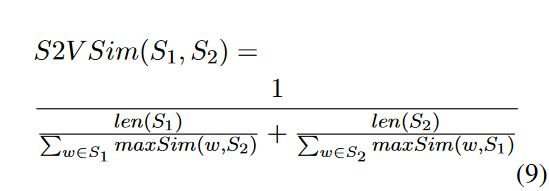



- **maxSim(w,S)** is to find the maximum similarity value between one word in one sentence and all words in another sentence, which is defined as:
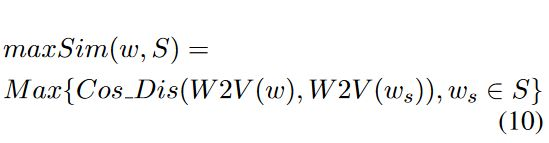


- **Cosine Similarity**

In [ ]:
def S2VSim(S1,S2):
    l1 = len(S1)
    l2 = len(S2)
    sum1 = 0
    sum2 = 0
    for w in S1:
        sum1 += maxSim(w,S2)
    for w in S2:
        sum2 += maxSim(w,S1)
    return 1/(l2/sum2+l1/sum1)


In [ ]:
def maxSim(w,S):
    max = -1
    for wS in S:
        score = 1 - distance.cosine(model_ft.wv[wS],model_ft.wv[w])
        if score>max:
            max = score
    return max

In [ ]:
s2vsim_features_train = [S2VSim(sentences_prep1_train[i],sentences_prep2_train[i]) for i in range(len(sentences_prep1_train))]
s2vsim_features_test = [S2VSim(sentences_prep1_test[i],sentences_prep2_test[i]) for i in range(len(sentences_prep1_test))]
s2vsim_features_dev = [S2VSim(sentences_prep1_dev[i],sentences_prep2_dev[i]) for i in range(len(sentences_prep1_dev))]


In [ ]:
feature_FT_wmdistance_train = np.asarray(feature_FT_wmdistance_train).reshape(-1)
feature_FT_wmdistance_dev = np.asarray(feature_FT_wmdistance_dev).reshape(-1)
feature_FT_wmdistance_test = np.asarray(feature_FT_wmdistance_test).reshape(-1)

Finally, correlation can be plotted between different indipendent features. This can be used to figure out which fetaures are going to be useful and necessary to build the SVR model.
The correlation here was plotted between the wm_distance of embeddings obtained through the fastetxt model trained on the availale dataset.

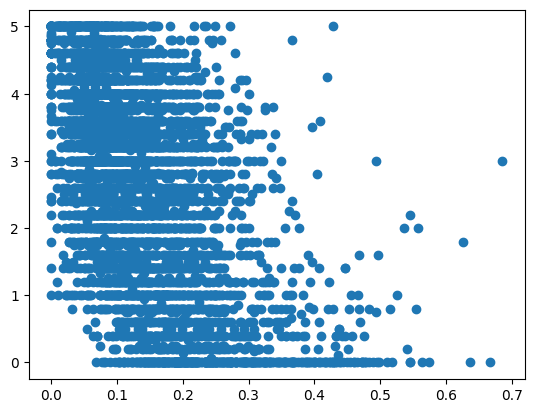

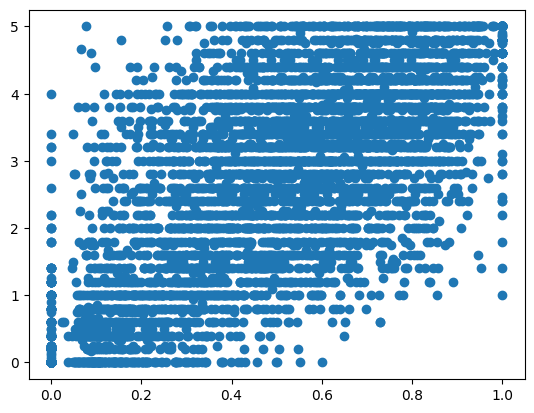

In [ ]:
plt.figure()
plt.plot(feature_FT_wmdistance_train,scores_unique,'o')
plt.figure()
plt.plot(features_tfidf_cos_train,scores_unique,'o')

#### BERT


In [ ]:
model = BertModel.from_pretrained('bert-base-uncased',output_hidden_states = True)


In [ ]:
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
def bert_cos(sentence_unique1,sentence_unique2):
    text1 = sentence_unique1
    text2 = sentence_unique2
    marked_text1 = "[CLS]" + text1 + "[SEP]"
    marked_text2 = "[CLS]" + text2 + "[SEP]"

    tokenized_text1 = tokenizer.tokenize(marked_text1)
    tokenized_text2 = tokenizer.tokenize(marked_text2)

    indexed_tokens1 = tokenizer.convert_tokens_to_ids(tokenized_text1)
    indexed_tokens2 = tokenizer.convert_tokens_to_ids(tokenized_text2)

    segments_ids1 = [1] * len(tokenized_text1)
    segments_ids2 = [1] * len(tokenized_text2)

    tokens_tensor1 = torch.tensor([indexed_tokens1])
    segments_tensors1 = torch.tensor([segments_ids1])

    tokens_tensor2 = torch.tensor([indexed_tokens2])
    segments_tensors2 = torch.tensor([segments_ids2])

    with torch.no_grad():

        outputs1 = model(tokens_tensor1, segments_tensors1)
        hidden_states1 = outputs1[2]
        outputs2 = model(tokens_tensor2, segments_tensors2)
        hidden_states2 = outputs2[2]

    token_vecs1 = hidden_states1[-2][0]
    sentence_embedding1 = torch.mean(token_vecs1, dim=0)
    token_vecs2 = hidden_states2[-2][0]
    sentence_embedding2 = torch.mean(token_vecs2, dim=0)

    return (1 - distance.cosine(sentence_embedding1, sentence_embedding2))

In [ ]:
feature_bert_cos_train = [bert_cos(sentence_unique1[i],sentence_unique1[i]) for i in range(len(sentence_unique1))]
feature_bert_cos_dev = [bert_cos(sentence1_dev[i],sentence1_dev[i]) for i in range(len(sentence1_dev))]
feature_bert_cos_test = [bert_cos(sentence1_test[i],sentence1_dev[i]) for i in range(len(sentence1_dev))]

#### Training of the SVR model
Once all the features are obtained from different unsupervised techniques, the SVR model can be trained with some of them.
To train the actual SVR model the **train, development and test set** can be devived into 2 different variables:
1. **X**: dataset without the presence of the target variable.
2. **y**: represents the target variable, containing just the scores related to the pair of sentences



In [ ]:
X_train= [[features_tfidf_cos_train[i],s2vsim_features_train[i],feature_FT_wmdistance_train[i]] for i in range(len(features_tfidf_cos_train))]
y_train=scores_unique
np.shape(X_train)

(5706, 3)

In [ ]:
X_dev = [[features_tfidf_cos_dev[i],s2vsim_features_dev[i],feature_FT_wmdistance_dev[i]] for i in range(len(features_tfidf_cos_dev))]
y_dev = scores_dev

In [ ]:
np.shape(X_dev)

(1500, 3)

In [ ]:
def hyperp_search(regr, parameters):
    gs = GridSearchCV(regr, parameters, cv=3, scoring = 'neg_mean_absolute_error', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("MAE train: %f using %s" % (np.abs(gs.best_score_), gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_dev)
    y_pred_train = best_model.predict(X_train)
    return best_model

In [ ]:
regr = SVR()
parameters={"kernel":['poly','linear','rbf'], "C":[60,80,100], "gamma":[0.001,0.1,1],
            "degree":[3,4,5], "epsilon":[0.001,0.01,0.1], "coef0":[1] }
best_model = hyperp_search(regr,parameters)

MAE train: 0.772267 using {'C': 100, 'coef0': 1, 'degree': 5, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


The hyperparameters chosen are the following ones:
- **Kernel**:poly
- **C**:100
- **Gamma**:0.1
- **Degree**:5
- **Epsilon**:0.1
- **cof0**:1

## Deep Learning
Finetuning different transformer-based sBERT models and further improvements

In [ ]:
from sentence_transformers import SentenceTransformer, util, InputExample, losses, evaluation
import math
import csv
import gzip
import os
import torch
import pandas as pd
from torch.utils.data import DataLoader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Semantic_similarity')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Semantic_similarity'

**Dataload preparing:**

In [ ]:
sts_dataset_path = 'dataset/stsbenchmark.tsv.gz'

if not os.path.exists(sts_dataset_path):
    util.http_get('https://sbert.net/datasets/stsbenchmark.tsv.gz', sts_dataset_path)

train_samples = []
dev_samples = []
test_samples = []

with gzip.open(sts_dataset_path, 'rt', encoding='utf8') as fIn:
    reader = csv.DictReader(fIn, delimiter='\t', quoting=csv.QUOTE_NONE)
    for row in reader:
        score = float(row['score']) / 5.0  # Normalize score to range 0 ... 1
        inp_example = InputExample(texts=[row['sentence1'], row['sentence2']], label=score)

        if row['split'] == 'dev':
            dev_samples.append(inp_example)
        elif row['split'] == 'test':
            test_samples.append(inp_example)
        else:
            train_samples.append(inp_example)


**sBERT model selection:**

In [ ]:
# example model
model_name = 'all-mpnet-base-v2'
finetuned_model = False
if os.path.exists('output/'+model_name):
    print(f"The model has already been finetuned")
    finetuned_model = True
    output_path = os.path.join('output', model_name)
    model = SentenceTransformer(output_path)
else: model = SentenceTransformer(model_name)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
"""
if device.type != 'cuda':
    raise SystemError('GPU device not found')
"""
model = model.to(device)

The model has already been finetuned


**Training hyperparameters:**

In [ ]:
num_epochs = 4
batch_size = 16
train_loss = losses.CosineSimilarityLoss(model=model)

train_dataloader = DataLoader(train_samples, batch_size=batch_size, shuffle=True)

warmup_steps = math.ceil(len(train_dataloader) * num_epochs * 0.1) #10% of train data for warm-up

# define model and evaluation saving path
model_save_path = 'output/'+model_name
os.mkdir(model_save_path) if not os.path.exists(model_save_path) else None
eval_save_path = os.path.join(model_save_path, 'eval')
os.mkdir(eval_save_path) if not os.path.exists(eval_save_path) else None


**Evaluate the original sBERT model before finetuning**

In [ ]:
if not finetuned_model:
    ori_evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(test_samples, name='sts-test-ori')
    ori_evaluator(SentenceTransformer(model_name), output_path=eval_save_path)

In [ ]:
# Define evaluator for the training process
evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(dev_samples, name='sts-dev')

**Start finetuning**
(if the model has already been finetuned, then load the finetuned model instead)

In [ ]:
if not finetuned_model:
    model.fit(train_objectives=[(train_dataloader, train_loss)],
            evaluator=evaluator,
            epochs=num_epochs,
            evaluation_steps=1000,
            warmup_steps=warmup_steps,
            output_path=model_save_path
            )

In [ ]:
if not finetuned_model:
    test_evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(test_samples, name='sts-test')
    test_evaluator(model, output_path=os.path.join(model_save_path, 'eval'))

result_test_ori = pd.read_csv(eval_save_path+'/similarity_evaluation_sts-test-ori_results.csv')
result_dev = pd.read_csv(eval_save_path+'/similarity_evaluation_sts-dev_results.csv')
result_test = pd.read_csv(eval_save_path+'/similarity_evaluation_sts-test_results.csv')

In [ ]:
# evaluation while training the model
result_dev

,epoch,steps,cosine_pearson,cosine_spearman,euclidean_pearson,euclidean_spearman,manhattan_pearson,manhattan_spearman,dot_pearson,dot_spearman
0,0,-1,0.906401,0.904905,0.897580,0.904903,0.896847,0.904041,0.906401,0.904905
1,1,-1,0.908456,0.907948,0.900285,0.907948,0.899392,0.906625,0.908456,0.907948
2,2,-1,0.907565,0.906673,0.900091,0.906673,0.898985,0.905004,0.907565,0.906673
3,3,-1,0.907626,0.906376,0.899025,0.906376,0.897950,0.904744,0.907626,0.906376


In [ ]:
# evaluation before training the model
result_test_ori

,epoch,steps,cosine_pearson,cosine_spearman,euclidean_pearson,euclidean_spearman,manhattan_pearson,manhattan_spearman,dot_pearson,dot_spearman
0,-1,-1,0.8404,0.834219,0.837867,0.834219,0.834409,0.83029,0.8404,0.834219


In [ ]:
# evaluation after training the model
result_test

,epoch,steps,cosine_pearson,cosine_spearman,euclidean_pearson,euclidean_spearman,manhattan_pearson,manhattan_spearman,dot_pearson,dot_spearman
0,-1,-1,0.877353,0.874395,0.868749,0.874395,0.867856,0.873171,0.877353,0.874395


## Possible extensions for improving the performance of transformer-based models
1. Including additional related data into training set
    - The companion datasets to the STS Benchmark
    - SNLI
2. Ensemble Learning

### The companion datasets to the STS Benchmark

In [ ]:
sts_companion_dataset_path = 'dataset/stscompanion/'

train_companion_samples = []
train_path = os.path.join(sts_companion_dataset_path, "sts-mt.csv")

with open(train_path, encoding='utf8') as fIn:
    reader = csv.reader(fIn, delimiter='\t', quoting=csv.QUOTE_NONE)
    for row in reader:
        score = float(row[3]) / 5.0  # Normalize score to range 0 ... 1
        inp_example = InputExample(texts=[row[4], row[5]], label=score)
        train_companion_samples.append(inp_example)

combined_train_samples = train_samples + train_companion_samples

train_dataloader_combined = DataLoader(combined_train_samples, batch_size=batch_size, shuffle=True)

In [ ]:
finetuned_combined_model = False
if os.path.exists('output/'+model_name+'_combined'):
    print(f"The model has already been finetuned")
    finetuned_combined_model = True
    output_path = os.path.join('output', model_name+'_combined')
    new_model = SentenceTransformer(output_path)
else: new_model = SentenceTransformer(model_name)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

"""
if device.type != 'cuda':
    raise SystemError('GPU device not found')
"""

new_model = new_model.to(device)
model_save_path_combined = 'output/'+model_name+'_combined'
os.mkdir(model_save_path_combined) if not os.path.exists(model_save_path_combined) else None
eval_combined_save_path = os.path.join(model_save_path_combined, 'eval')
os.mkdir(eval_combined_save_path) if not os.path.exists(eval_combined_save_path) else None

The model has already been finetuned


In [ ]:
if not finetuned_combined_model:
    combined_ori_evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(test_samples, name='sts-test-ori')
    combined_ori_evaluator(new_model, output_path=eval_combined_save_path)

num_epochs = 4
batch_size = 16
train_loss = losses.CosineSimilarityLoss(model=new_model)

# define evaluator
evaluator_combined = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(dev_samples, name='sts-dev')

if not finetuned_combined_model:
    new_model.fit(train_objectives=[(train_dataloader_combined, train_loss)],
            evaluator=evaluator_combined,
            epochs=num_epochs,
            evaluation_steps=1000,
            warmup_steps=warmup_steps,
            output_path=model_save_path_combined
            )

In [ ]:
if not finetuned_combined_model:
    test_evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(test_samples, name='sts-test')
    test_evaluator(new_model, output_path=os.path.join(model_save_path_combined, 'eval'))

result_test_pre = pd.read_csv(eval_save_path+'/similarity_evaluation_sts-test_results.csv')
result_dev = pd.read_csv(eval_combined_save_path+'/similarity_evaluation_sts-dev_results.csv')
result_test = pd.read_csv(eval_combined_save_path+'/similarity_evaluation_sts-test_results.csv')

In [ ]:
result_dev

,epoch,steps,cosine_pearson,cosine_spearman,euclidean_pearson,euclidean_spearman,manhattan_pearson,manhattan_spearman,dot_pearson,dot_spearman
0,0,-1,0.906933,0.906006,0.900296,0.906006,0.899826,0.905180,0.906933,0.906006
1,1,-1,0.906693,0.905103,0.898702,0.905103,0.897738,0.903908,0.906693,0.905103
2,2,-1,0.906573,0.904591,0.898821,0.904591,0.898337,0.903972,0.906573,0.904591
3,3,-1,0.907041,0.905327,0.899106,0.905327,0.898490,0.904524,0.907041,0.905327


In [ ]:
result_test_pre

,epoch,steps,cosine_pearson,cosine_spearman,euclidean_pearson,euclidean_spearman,manhattan_pearson,manhattan_spearman,dot_pearson,dot_spearman
0,-1,-1,0.877353,0.874395,0.868749,0.874395,0.867856,0.873171,0.877353,0.874395


In [ ]:
result_test

,epoch,steps,cosine_pearson,cosine_spearman,euclidean_pearson,euclidean_spearman,manhattan_pearson,manhattan_spearman,dot_pearson,dot_spearman
0,-1,-1,0.879127,0.877669,0.871397,0.877669,0.870755,0.876787,0.879127,0.877669


### SNLI dataset

In [ ]:
train_df = pd.read_csv("dataset/SNLI_Corpus/snli_1.0_train.csv")

# Shape of the data
print(f"Total train samples : {train_df.shape[0]}")

In [ ]:
print(f"Sentence1: {train_df.loc[1, 'sentence1']}")
print(f"Sentence2: {train_df.loc[1, 'sentence2']}")
print(f"Similarity: {train_df.loc[1, 'similarity']}")

**Data preprocessing**

In [ ]:
# drop NaN values
print("Number of missing values")
print(train_df.isnull().sum())
train_df.dropna(axis=0, inplace=True)

In [ ]:
print("Train Target Distribution")
print(train_df.similarity.value_counts())

In [ ]:
# drop '-' from the similarity labels when there are no majority for the labels
train_df = (
    train_df[train_df.similarity != "-"]
    .sample(frac=1.0, random_state=42)
    .reset_index(drop=True)
)

In [ ]:
train_df[:10]

In [ ]:
train_df["label"] = train_df["similarity"].apply(
    lambda x: 0 if x == "contradiction" else 5 if x == "entailment" else 2.5
)
print(train_df["label"][:10])

**Model Finetuning as previous dataset**

In [ ]:
train_samples_snli = []
for index, row in train_df.iterrows():
    score = float(row['label']) / 5.0  # Normalize score to range 0 ... 1
    inp_example = InputExample(texts=[row['sentence1'], row['sentence2']], label=score)
    train_samples_snli.append(inp_example)

SNLI_train_samples = train_samples+train_samples_snli
train_dataloader_SNLI = DataLoader(SNLI_train_samples, batch_size=batch_size, shuffle=True)

finetuned_SNLI_model = False
if os.path.exists('output/'+model_name+'_SNLI'):
    print(f"The model has already been finetuned")
    finetuned_SNLI_model = True
    output_path = os.path.join('output', model_name+'_SNLI')
    new_model = SentenceTransformer(output_path)
else: SNLI_model = SentenceTransformer(model_name)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if device.type != 'cuda':
    raise SystemError('GPU device not found')

SNLI_model = SNLI_model.to(device)
model_save_path_SNLI = 'output/'+model_name+'_SNLI'
os.mkdir(model_save_path_SNLI) if not os.path.exists(model_save_path_SNLI) else None
eval_SNLI_save_path = os.path.join(model_save_path_SNLI, 'eval')
os.mkdir(eval_SNLI_save_path) if not os.path.exists(eval_SNLI_save_path) else None

if not finetuned_SNLI_model:
    SNLI_ori_evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(test_samples, name='sts-test-ori')
    SNLI_ori_evaluator(new_model, output_path=eval_SNLI_save_path)

# define evaluator
evaluator_SNLI = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(dev_samples, name='sts-dev')

In [ ]:
num_epochs = 4
batch_size = 16
train_loss = losses.CosineSimilarityLoss(model=SNLI_model)

if not finetuned_SNLI_model:
    SNLI_model.fit(train_objectives=[(train_dataloader_SNLI, train_loss)],
            evaluator=evaluator_SNLI,
            epochs=num_epochs,
            evaluation_steps=1000,
            warmup_steps=warmup_steps,
            output_path=model_save_path_SNLI
            )

In [ ]:
if not finetuned_SNLI_model:
    test_evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(test_samples, name='sts-test')
    test_evaluator(new_model, output_path=os.path.join(model_save_path_SNLI, 'eval'))

In [ ]:
result_test_pre = pd.read_csv(eval_save_path+'/similarity_evaluation_sts-test_results.csv')
result_dev = pd.read_csv(eval_SNLI_save_path+'/similarity_evaluation_sts-dev_results.csv')
result_test = pd.read_csv(eval_SNLI_save_path+'/similarity_evaluation_sts-test_results.csv')

### Ensemble Learning

In [ ]:
ensemble_test_samples_a = []
ensemble_test_samples_b = []
ensemble_labels = []
train_path = os.path.join("dataset/stsbenchmark/sts-test.csv")

with open(train_path, encoding='utf8') as fIn:
    reader = csv.reader(fIn, delimiter='\t', quoting=csv.QUOTE_NONE)
    for row in reader:
        score = float(row[4]) / 5.0  # Normalize score to range 0 ... 1
        ensemble_test_samples_a.append(row[5])
        ensemble_test_samples_b.append(row[6])
        ensemble_labels.append(score)

In [ ]:
from sklearn.metrics.pairwise import paired_cosine_distances

models = ['all-MiniLM-L6-v2', 'all-mpnet-base-v2', 'all-roberta-large-v1', 'msmarco-distilbert-base-v4']

embedding1 = []
embedding2 = []
for single_model in models:
    ensemble_model = SentenceTransformer("output/"+single_model+"_combined")
    ensemble_result_a = ensemble_model.encode(ensemble_test_samples_a)
    embedding1.append(ensemble_result_a)
    ensemble_result_b = ensemble_model.encode(ensemble_test_samples_b)
    embedding2.append(ensemble_result_b)

In [ ]:
print(embedding1[0].shape)
print(embedding2[0].shape)

(1379, 384)
(1379, 384)


In [ ]:
# Calculate the cosine similarity for all different models
import numpy as np

sim_score = []
for idx in range(len(models)):
    cosine_scores = 1 - (paired_cosine_distances(embedding1[idx], embedding2[idx]))
    sim_score.append(cosine_scores)

# As ensemble learning to compute the mean value of all models prediction
ensemble_scores = np.mean(np.array(sim_score), axis=0)

In [ ]:
ensemble_labels = np.array(ensemble_labels)

In [ ]:
ensemble_scores

array([0.7300843 , 0.8649848 , 0.9597475 , ..., 0.35167527, 0.00933088,
       0.18726774], dtype=float32)

## Prediction results
First we will upload the test set in order to be able to apply the different models trained previously. We will view predictions of the 3 models realised previously on the train:
1. Unsupervised models
2. Supervised model
3. Deep Learning models

## Unsupervised Models on Test

The prediction of score between pair of sentences can be applied by using the difefrent models previoulsy trained. Therefore, TF-IDF, FastText, and Word2Vec are used. It is important to remeber that before doing predictions, the test set has to be preprocessed following the same path of the train set. The preprocessing performed on test set is the following one:

To compute the predicted score on pair of sentences the features_tfidf function can be used. Then the respective cosine similarity obtained is multiply by 5, and it represents the final prediction similarity score between sentences.

In [ ]:
tfidf_test= np.array(features_tfidf_cos_test)
scores_tfidf= tfidf_test*5

A table can be computed with correspondent sentences belonging to same samples, actual score and predicted score.

In [ ]:
table_data = {
    "score": data_test["Score"].values[:1379],  # Replace "n" with the desired number of rows
    "predicted_score": scores_tfidf,  # Replace "predicted_scores" with the actual variable name
    "sentence1": data_test["Sentence 1"].values[:1379],
    "sentence2": data_test["Sentence 2"].values[:1379]
}

# Create the table DataFrame
table = pd.DataFrame(table_data)

#Print the table
#print(table)

In [ ]:
from scipy.stats import pearsonr, spearmanr

In [ ]:
eval_pearson_cosine, _ = pearsonr(scores_test, scores_tfidf)
eval_spearman_cosine, _ = spearmanr(scores_test, scores_tfidf)

print(eval_pearson_cosine)
print(eval_spearman_cosine)

0.6725647529324491
0.6557710607601152


The same process can be performed to predict the semantic similarity scores of sentences by using the FastText model.

In [ ]:
feature_FT_cos_test = [[1 - distance.cosine(np.mean(model_ft.wv[sentences_prep1_test[i]],axis = 0),np.mean(model_ft.wv[sentences_prep2_test[i]], axis = 0))] for i in range(len(sentences_prep1_test))]
FT_vec= np.array(feature_FT_cos_test)
scores_ft=FT_vec*5
scores_ft

array([[4.98593509],
       [4.98507261],
       [4.99839336],
       ...,
       [4.98096764],
       [4.93468523],
       [4.89802659]])

As it can be seen pearson correlation is really low. The fasttext model is not appropriate for this kind of task, because it gives high prediction score results for each pair of sentence.

In [ ]:
eval_pearson_cosine, _ = pearsonr(scores_test, scores_ft.flatten())
eval_spearman_cosine, _ = spearmanr(scores_test, scores_ft.flatten())

print(eval_pearson_cosine)
print(eval_spearman_cosine)

0.3047992382943182
0.3926011588621207


## Supervised model


The same process can be applied to the SVR model. The devlopment set was used to tune the hyperparameters. While, test set is used to see the actual performance of the model chosen.

In [ ]:
X_test= [[features_tfidf_cos_test[i],s2vsim_features_test[i],feature_FT_wmdistance_test[i]] for i in range(len(feature_FT_wmdistance_test))]
y_test=scores_test
np.shape(X_test)

(1379, 3)

In [ ]:
scores_SVR= best_model.predict(X_test)
scores_SVR

array([2.93121205, 4.06145546, 4.20583536, ..., 2.35146873, 0.13827224,
       1.42954499])

In [ ]:
table_data = {
    "score": data_test["Score"].values[:1379],  # Replace "n" with the desired number of rows
    "predicted_score": scores_SVR,  # Replace "predicted_scores" with the actual variable name
    "sentence1": data_test["Sentence 1"].values[:1379],
    "sentence2": data_test["Sentence 2"].values[:1379]
}

# Create the table DataFrame
table = pd.DataFrame(table_data)

#Print the table
print(table)

      score  predicted_score  \
0       2.5         2.931212   
1       3.6         4.061455   
2       5.0         4.205835   
3       4.2         3.738687   
4       1.5         2.038965   
...     ...              ...   
1374    0.0         1.456182   
1375    1.0         1.867639   
1376    1.0         2.351469   
1377    0.0         0.138272   
1378    0.0         1.429545   

                                              sentence1  \
0                           A girl is styling her hair.   
1              A group of men play soccer on the beach.   
2         One woman is measuring another woman's ankle.   
3                       A man is cutting up a cucumber.   
4                              A man is playing a harp.   
...                                                 ...   
1374  Philippines, Canada pledge to further boost re...   
1375  Israel bars Palestinians from Jerusalem's Old ...   
1376         How much do you know about Secret Service?   
1377  Obama Struggles to 

In [ ]:
eval_pearson_cosine, _ = pearsonr(scores_test, scores_SVR)
eval_spearman_cosine, _ = spearmanr(scores_test, scores_SVR)

print(eval_pearson_cosine)
print(eval_spearman_cosine)

0.6776128461065781
0.6654497739867118


## Transformer-based model prediction on test

In [ ]:
models = ['all-MiniLM-L6-v2', 'all-mpnet-base-v2', 'all-roberta-large-v1', 'msmarco-distilbert-base-v4']

In [ ]:
evaluation = []
for single_model_name in models:
    result_test_ori = pd.read_csv('output/'+single_model_name+'/eval'+'/similarity_evaluation_sts-test-ori_results.csv')
    result_test = pd.read_csv('output/'+single_model_name+'/eval'+'/similarity_evaluation_sts-test_results.csv')
    result_test_combined = pd.read_csv('output/'+single_model_name+'_combined/eval'+'/similarity_evaluation_sts-test_results.csv')
    evaluation.append([result_test_ori['cosine_pearson'].values[0], result_test['cosine_pearson'].values[0], result_test_combined['cosine_pearson'].values[0]])

In [ ]:
# Cosine similarity + pearson correlation
pd.DataFrame(evaluation, columns=['original', 'finetuned', 'extension'], index=models)

,original,finetuned,extension
all-MiniLM-L6-v2,0.827406,0.859695,0.858844
all-mpnet-base-v2,0.840400,0.877353,0.879127
all-roberta-large-v1,0.841868,0.883874,0.887645
msmarco-distilbert-base-v4,0.795048,0.856981,0.849270


**Ensemble learning result**

In [ ]:
print(ensemble_scores)
print(ensemble_labels)

[0.7300843  0.8649848  0.9597475  ... 0.35167527 0.00933088 0.18726774]
[0.5  0.72 1.   ... 0.2  0.   0.  ]


In [ ]:
from scipy.stats import pearsonr

#calculate the pearson correlation of the final ensemble models
final_cosine_pearson = pearsonr(ensemble_labels, ensemble_scores)
final_cosine_pearson

PearsonRResult(statistic=0.8885819853672617, pvalue=0.0)

## Conclusion

In conclusion, after trying several unsupervised models and the SVR supervised model it has been seen that the best ones for semantic text similarity proved to be TF-IDF and SVR using the previously mentioned parameters. Of course, transformers as complex neural network have been proven to be the best one.